In [80]:
import pickle 
import numpy as np 
import pandas as pd
import networkx as nx
from tqdm import tqdm
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from itertools import combinations
from src.utils.general_utils import *
import community
import collections

pas besoin de ça

In [101]:
movie_path = 'data/Movie.pkl'
actors_path = 'data/Actor.pkl'

with open(movie_path, 'rb') as file:
    Movie = pickle.load(file)

with open(actors_path, 'rb') as file:
    Actors = pickle.load(file)

In [102]:
from src.utils.data_utils import *
from src.utils.general_utils import *

Commencer à copier depuis là

# Clustering analysis
In this part we will plot the links between each actors and analysing them. To see if the analysis, we create a network with the Network function described in utilswith the actors that made more than 20 films to see if the analysis is doable.

In [105]:
start_time = time.time()
G = create_actor_network(Actors, min_movies=20)
print("Created graph with actors:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
end_time = time.time()
print("time to compute :", end_time - start_time, "seconds")

100%|█████████████████████████████████████████████████████████████████████████| 44122/44122 [00:02<00:00, 20266.38it/s]


Created graph with actors:
Number of nodes: 3637
Number of edges: 206863
time to compute : 9.60880994796753 seconds


Now that the network is created, we plot it to watch it and to get an understanding before making the clusters

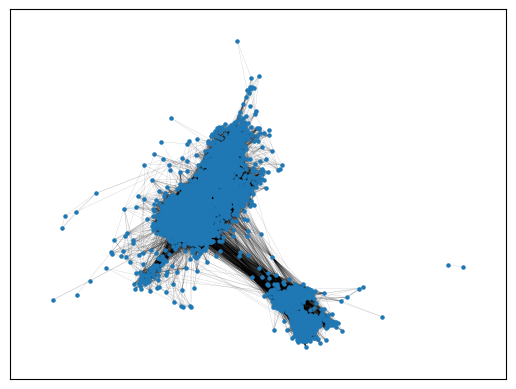

In [106]:
sp = nx.spring_layout(G, k=0.1, seed=42)
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=5, width=0.05)
# plt.axes('off')
plt.show()

We can see different groups already, but we will use the louvain algorithm to divide these clusters mathematically, and plot it. 

In [108]:
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)


Number of clusters : 11
Clusters ordered by size : Counter({1: 1608, 0: 1142, 7: 357, 6: 310, 2: 89, 3: 88, 4: 23, 8: 11, 5: 4, 9: 3, 10: 2})


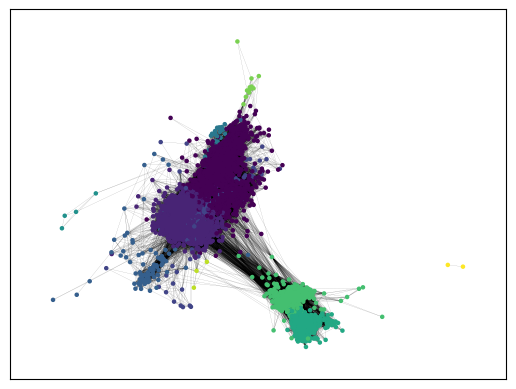

time to compute: 44.7 seconds


In [112]:
start_time = time.time()
sp = nx.spring_layout(G, k=0.1, seed=42)
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=5, node_color=values, width=0.05)
# plt.axes('off')
plt.show()
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")

In [115]:
partition = pd.Series(partition)
partition.name = "cluster_id"
actors_clustered = pd.merge(Actors,partition, right_index=True, left_on= "Freebase_actor_ID")

In [117]:
actors_clustered.cluster_id.value_counts()
print("Number of clusters :", len(counter))
print("Clusters ordered by size :", counter)


Number of clusters : 11
Clusters ordered by size : Counter({1: 1608, 0: 1142, 7: 357, 6: 310, 2: 89, 3: 88, 4: 23, 8: 11, 5: 4, 9: 3, 10: 2})


In [119]:
index_to_keep = partition.value_counts()[partition.value_counts()>10].index
index_to_keep

Index([1, 0, 7, 6, 2, 3, 4, 8], dtype='int64', name='cluster_id')

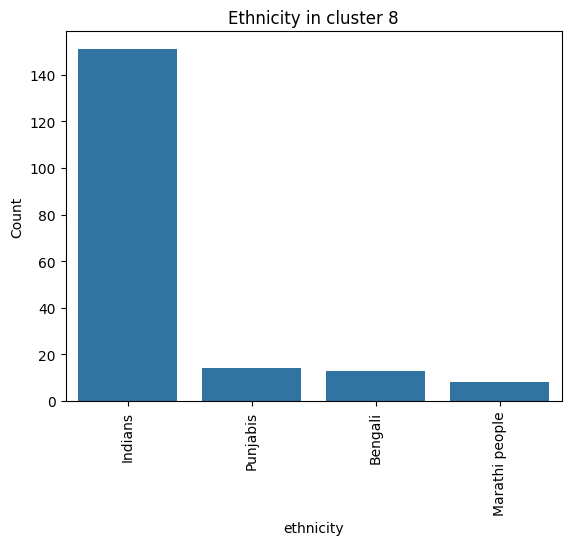

In [123]:
example = actors_clustered[actors_clustered["cluster_id"]==8]
example_counts = pd.DataFrame(example, columns=['ethnicity']).value_counts().reset_index()
example_counts.columns = ['ethnicity', 'Count']

example_counts = example_counts[example_counts.Count>5]

sns.barplot(data=abc_counts, x='ethnicity', y = 'Count')
plt.xticks(rotation=90)  
plt.title('Ethnicity in cluster 8')
plt.show()

Here per exemple we see that cluster 8 is composed of indian people. We will do other analysis with theses clusters to see what is determining them. Is it the gender of the actors ? The country they're from or the kind of career